# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# 1. create an unduplicated version of the driver count, since it's a total for the city and repeats on every row the city has

# create a variable that will use ranking to return 1 for the first time a city shows up in each type (when sorted by fare)
pyber_data_df['city_rank'] = pyber_data_df.groupby(['type','city'])['fare'].rank()
# assign the driver count to appear only in that one city row per type, all else null
pyber_data_df['driver_undup'] = np.where(pyber_data_df['city_rank']==1,pyber_data_df['driver_count'],pd.NA)

pyber_data_df

,city,date,fare,ride_id,driver_count,type,city_rank,driver_undup
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,3.0,<NA>
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,23.0,<NA>
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,17.0,<NA>
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,7.0,<NA>
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,16.0,<NA>
...,...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,1.0,6
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,6.0,<NA>
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,1.0,1
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,6.0,<NA>


In [4]:
#  2. Create a PyBer summary DataFrame. 

# use agg to summarize all stats at once into a df instead of doing them one at a time and then putting them together
## the sum of driver_undup will return the accurate number of drivers since extra rows per city within type will be null (so +0 to the sum)
pyber_summary_df = pyber_data_df.groupby('type').agg({'ride_id':'count',
                                                      'driver_undup':'sum',
                                                      'fare':'sum'})

# assign proper names to the result columns
col_names = ['Total Rides', 'Total Drivers', 'Total Fares']
pyber_summary_df.columns = col_names

# use pd built in column math to get the averages based off result columns
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Total Fares']/pyber_summary_df['Total Rides']
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Total Fares']/pyber_summary_df['Total Drivers']

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [5]:
#  3. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [6]:
#  4. Format the columns.

numeric_columns = ['Total Rides', 'Total Drivers']
money_columns = ['Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']

# use for loops to iterate through the columns instead of copy/pasting the formatting code
for col_name in numeric_columns:
    pyber_summary_df[col_name] = pyber_summary_df[col_name].map("{:,}".format)

for col_name in money_columns:
    pyber_summary_df[col_name] = pyber_summary_df[col_name].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [7]:
# 1. Read the merged DataFrame

pyber_data_df

,city,date,fare,ride_id,driver_count,type,city_rank,driver_undup
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,3.0,<NA>
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,23.0,<NA>
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,17.0,<NA>
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,7.0,<NA>
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,16.0,<NA>
...,...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,1.0,6
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,6.0,<NA>
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,1.0,1
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,6.0,<NA>


In [8]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare_df = pd.DataFrame(pyber_data_df.groupby(['type','date'])['fare'].sum())

fare_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [9]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

fare_df.reset_index(inplace=True)

In [10]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fare_df = fare_df.pivot(index='date',columns='type',values='fare')

fare_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [11]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fare_2019_df = fare_df.loc['2019-01-01':'2019-04-28']

In [12]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

fare_2019_df.index = pd.to_datetime(fare_2019_df.index)

In [13]:
# 7. Check that the datatype for the index is datetime using df.info()

fare_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [14]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

week_df = fare_2019_df.resample('W').sum()

week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


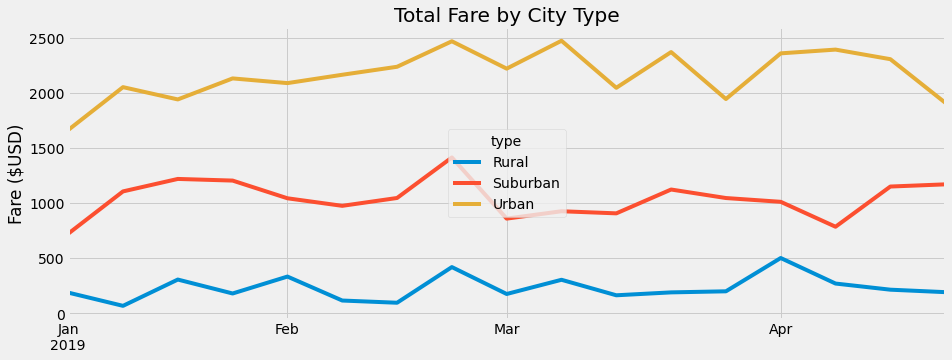

In [15]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from turtle import position
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = week_df.plot(figsize=(14,5))

ax.set(xlabel=None, ylabel='Fare ($USD)', title='Total Fare by City Type')

ax.legend(loc='center', title='type')

plt.savefig("analysis/PyBer_fare_summary.png",facecolor='white', bbox_inches='tight')
